## Decision trees
A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization. 

The decision tree may not always provide a clear-cut answer or decision. Instead, it may present options so the data scientist can make an informed decision on their own. Decision trees imitate human thinking, so it’s generally easy for data scientists to understand and interpret the results.

Populating the interactive namespace from numpy and matplotlib


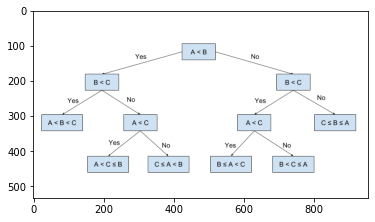

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()

### I'll be using sci-kit learn for this project because it has an extremely easy-to-use and efficient class to handle a decision tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Reading in the data and splitting it into training and testing data

In [3]:

iris = pd.read_csv('iris.csv')
iris.head()

train_data = iris.loc[np.arange(0,40)].append(iris.loc[np.arange(50,90)],ignore_index=True).append(iris.loc[np.arange(100,140)],
                                                                                                   ignore_index=True)
test_data = iris.loc[np.arange(40,50)].append(iris.loc[np.arange(90,100)],ignore_index=True).append(iris.loc[np.arange(140,150)],
                                                                                                    ignore_index=True)

train_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Creating and training our model

In [4]:
x = train_data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = np.array(train_data['variety'])
clf = tree.DecisionTreeClassifier(max_depth=3)
model = clf.fit(x, y)

### Using our Model for predictions

In [5]:
predictions = model.predict(test_data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])
pct_correct = 100 * np.count_nonzero(predictions==np.array(test_data['variety'])) / len(test_data)
print('The decision tree model correctly predicted ', pct_correct, '% of the test data correctly', sep='') 

The decision tree model correctly predicted 100.0% of the test data correctly


### Plotting the trees

c:\Users\mwj97\anaconda3\lib\site-packages\sklearn\tree\_export.py:183: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


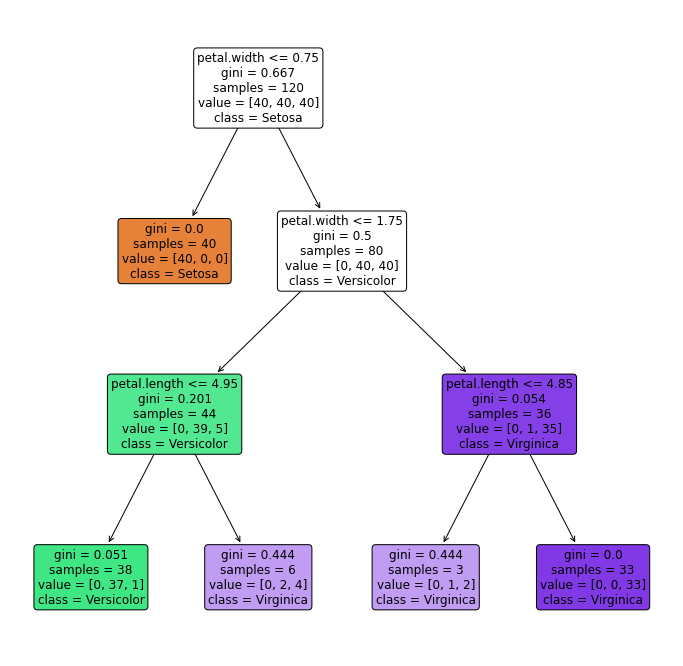

In [6]:
plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
              class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True, fontsize=12,
              rounded=True, rotate=True)
plt.show()

### Explanation of the Plot:
We can see in the top line what the criteria are for each observation. Observations that meet that criteria are pushed to the left. A negative answer to that question is pushed down to the right. For that criteria, the Gini function output is displayed on the second line. According to the algorithm, that is the lowest Gini score possible based on all possible splits.A sample indicates how many observations are contained in the box. Our entire training data set is contained in the top-most box, which consists of 120 observations. Each parent node has two child nodes that contain all the samples. There is one observation of each type in each box, so we know how many there are. There is a list that shows how many [setosa, veriscolor, virginica] observations are in that box. Finally, the class tells us what most observations in that box are classified as. The class of leaf/end nodes also represents how the decision tree would classify any observations that fall within that box. Classes are distributed throughout the tree based on the color and darkness of the boxes. Orange boxes have more Setosa flowers in them, green boxes have more Virginica flowers, and purple boxes have more Versicolor flowers.